In [7]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
data = pd.read_csv(url)

In [9]:
# Load the dataset directly from url
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
data = pd.read_csv(url)

# View the first few rows of the dataset
data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [11]:
# View the types of the dataset
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [13]:
# here, we can ee the types of columns in the dataset
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [15]:
# View the shape of the dataset
data.shape

(1000, 40)

In [16]:
# View the number of unique values in each column of the dataset
data.nunique


<bound method DataFrame.nunique of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  polic

In [18]:
# Counting the number of frauds reported vs non-frauds
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [19]:
# Counting the occurrences of different states in the 'incident_state' column
data['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

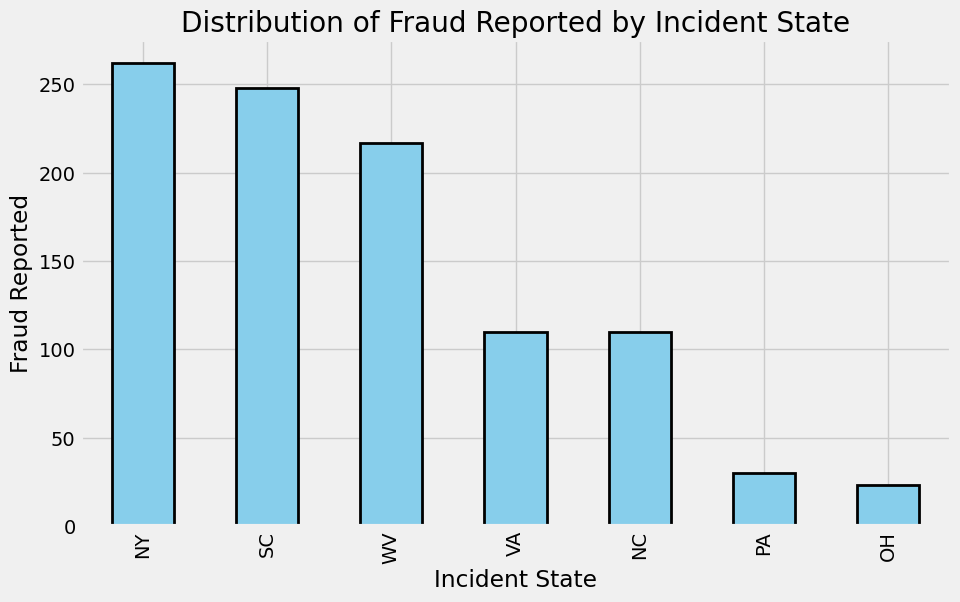

In [21]:
import matplotlib.pyplot as plt

# Assuming data is your DataFrame containing the data
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = data['incident_state'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', linewidth=2)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Incident State')
ax.set_title('Distribution of Fraud Reported by Incident State')
plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset directly from URL
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
data = pd.read_csv(url)

# Drop unnecessary columns
data.drop(['policy_number', 'policy_bind_date', '_c39'], axis=1, inplace=True)

# Handling missing values
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')
data[['collision_type', 'property_damage', 'police_report_available']] = cat_imputer.fit_transform(data[['collision_type', 'property_damage', 'police_report_available']])
data[['umbrella_limit', 'capital-gains', 'capital-loss']] = num_imputer.fit_transform(data[['umbrella_limit', 'capital-gains', 'capital-loss']])

# Encode categorical variables
le = LabelEncoder()
data['fraud_reported'] = le.fit_transform(data['fraud_reported'])
data = pd.get_dummies(data, drop_first=True)

# Split the data into independent variables (X) and target variable (y)
X = data.drop('fraud_reported', axis=1)
y = data['fraud_reported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Example prediction
example_data = X_test.iloc[[0]]
example_prediction = rf_model.predict(example_data)
print("Example Prediction:", example_prediction)

Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       145
           1       0.33      0.02      0.03        55

    accuracy                           0.72       200
   macro avg       0.53      0.50      0.44       200
weighted avg       0.62      0.72      0.62       200

Confusion Matrix:
[[143   2]
 [ 54   1]]
Example Prediction: [0]


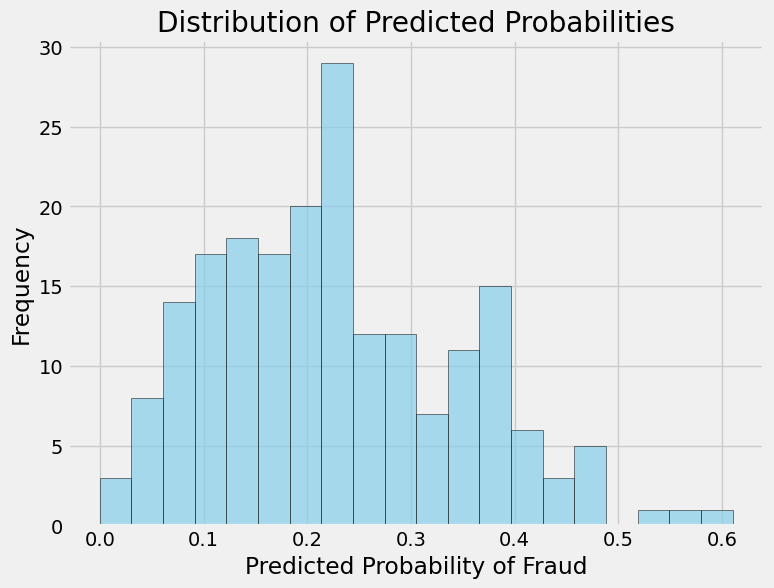

In [23]:
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (fraudulent)
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Plot histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_probs, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

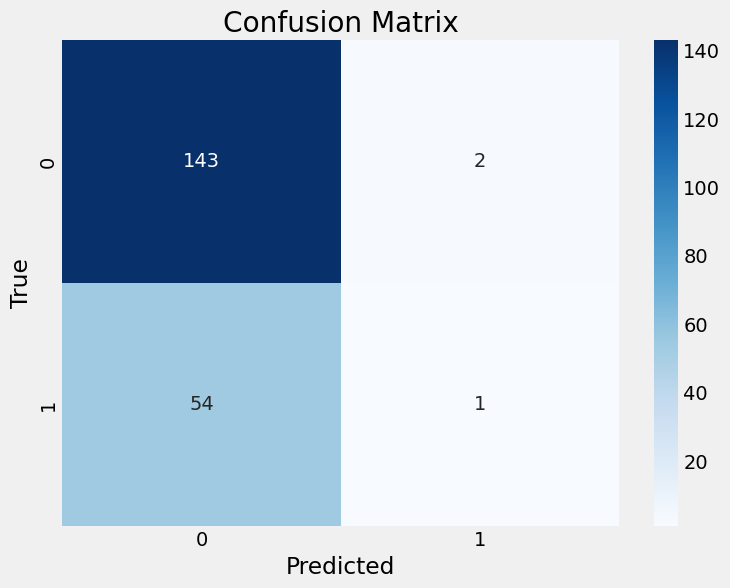

In [25]:
# import seaborn as sns

# Define the confusion matrix
conf_matrix = [[143, 2],
               [54, 1]]

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Explaining the Matrix

-True Positive (TP): Model correctly predicted positive instances.

-True Negative (TN): Model correctly predicted negative instances.

-False Positive (FP): Model incorrectly predicted positive instances (Type I error).

-False Negative (FN): Model incorrectly predicted negative instances (Type II error).

Here, TP = 1

TN = 143

FP = 2

FN = 54